In [2]:
%matplotlib inline
%qtconsole --colors=linux
%reload_ext watermark

In [3]:
import matplotlib.pyplot as plt
from matplotlib import rc
import daft

#filter warnings for presentation
import warnings
# warnings.filterwarnings('ignore')

# plt.rcParams['figure.figsize'] = 14, 8
# rc("font", family="serif", size=12)
# rc("text", usetex=False)

%watermark

2016-11-14T16:28:39-08:00

CPython 3.5.2
IPython 5.1.0

compiler   : MSC v.1900 64 bit (AMD64)
system     : Windows
release    : 10
machine    : AMD64
processor  : Intel64 Family 6 Model 94 Stepping 3, GenuineIntel
CPU cores  : 8
interpreter: 64bit


In [82]:
# declare the shape and size, and various styling
pgm = daft.PGM(shape=[3.5, 3.5], origin=[-0.5, 0], grid_unit=4,
               label_params={'fontsize':18}, observed_style='shaded')

# observed data
pgm.add_node(daft.Node("y", r"$x_i$", 1, 1.4, scale=2, observed=True))
# pgm.add_node(daft.Node("x", r"$\mathbf{x}_{i}$", 1, 0.8, scale=2, 
#                        fixed=True, offset=(0,-30)))

# individual items plate
pgm.add_plate(daft.Plate([0.5, 1.0, 1, 2.0], label=r"$i \in 1:N$", 
                         shift=-0.1))

pgm.add_plate(daft.Plate([0.5, 0.5, 1.0, 0.3], label=r"$j \in 1:K$", 
                         shift=-0.1))
# pooled beta (latent parameters)
pgm.add_node(daft.Node("z", r"$z_{i}$", 1, 2.4, scale=2))
pgm.add_node(daft.Node("z_pi", r"$\pi$", 1, 3.2, scale=2,
                       fixed=True, offset=(0,10)))
# pooled measurement error
pgm.add_node(daft.Node("sigma", r"$\Sigma_j$", 1.1, 0.5, scale=2, fixed=True, offset=(10,10)) )
pgm.add_node(daft.Node("mu", r"$\mu_j$", 0.9, 0.5, scale=2, fixed=True, offset=(-10,10)))

In [83]:
# draw directed edges
pgm.add_edge("z_pi", "z")
pgm.add_edge("z", "y")
# pgm.add_edge("x", "y")
pgm.add_edge("sigma", "y")
pgm.add_edge("mu", "y")

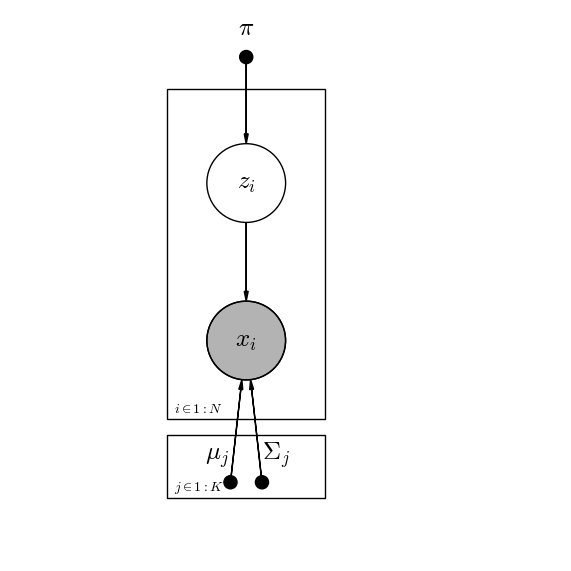

In [84]:
pgm.render()
plt.savefig("gmmPlate.png")

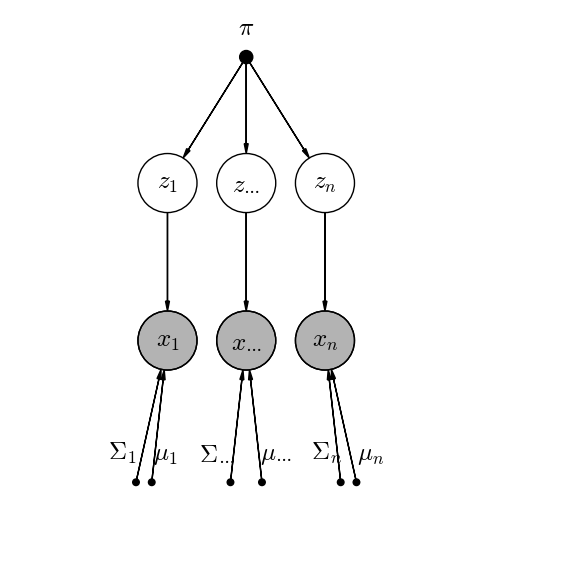

In [59]:
# declare the shape and size, and various styling
pgmU = daft.PGM(shape=[3.5, 3.5], origin=[-0.5, 0], grid_unit=4,
               label_params={'fontsize':18}, observed_style='shaded')

# multinoulli
pgmU.add_node(daft.Node("pi", r"$\pi$", 1, 3.2, scale=2,
                       fixed=True, offset=(0,10)))
# observed data
pgmU.add_node(daft.Node("y", r"$x_1$", 0.5, 1.4, scale=1.5, observed=True))
pgmU.add_node(daft.Node("yd", r"$x_{\cdots}$", 1, 1.4, scale=1.5, observed=True))
pgmU.add_node(daft.Node("yn", r"$x_n$", 1.5, 1.4, scale=1.5, observed=True))

# pooled beta (latent parameters)
pgmU.add_node(daft.Node("z", r"$z_{1}$", 0.5, 2.4, scale=1.5))
pgmU.add_node(daft.Node("zd", r"$z_{\cdots}$", 1, 2.4, scale=1.5))
pgmU.add_node(daft.Node("zn", r"$z_{n}$", 1.5, 2.4, scale=1.5))

# pooled measurement error
pgmU.add_node(daft.Node("sigma", r"$\Sigma_1$", 0.3, 0.5, scale=1.0, fixed=True, offset=(-10,10)) )
pgmU.add_node(daft.Node("mu", r"$\mu_1$", 0.4, 0.5, scale=1.0, fixed=True, offset=(10,10)))
pgmU.add_node(daft.Node("sigmad", r"$\Sigma_{\cdots}$", 0.9, 0.5, scale=1.0, fixed=True, offset=(-10,10)) )
pgmU.add_node(daft.Node("mud", r"$\mu_{\cdots}$", 1.1, 0.5, scale=1.0, fixed=True, offset=(10,10)))
pgmU.add_node(daft.Node("sigman", r"$\Sigma_n$", 1.6, 0.5, scale=1.0, fixed=True, offset=(-10,10)) )
pgmU.add_node(daft.Node("mun", r"$\mu_n$", 1.7, 0.5, scale=1.0, fixed=True, offset=(10,10)))

# draw directed edges
pgmU.add_edge("pi", "z")
pgmU.add_edge("pi", "zd")
pgmU.add_edge("pi", "zn")


pgmU.add_edge("z", "y")
pgmU.add_edge("zd", "yd")
pgmU.add_edge("zn", "yn")
# pgm.add_edge("x", "y")
pgmU.add_edge("sigma", "y")
pgmU.add_edge("mu", "y")
pgmU.add_edge("sigmad", "yd")
pgmU.add_edge("mud", "yd")
pgmU.add_edge("sigman", "yn")
pgmU.add_edge("mun", "yn")
pgmU.render()
plt.savefig("gmmUnrolled.png")

In [31]:
pgmU.render()
#plt.savefig("gmmPlate.png")

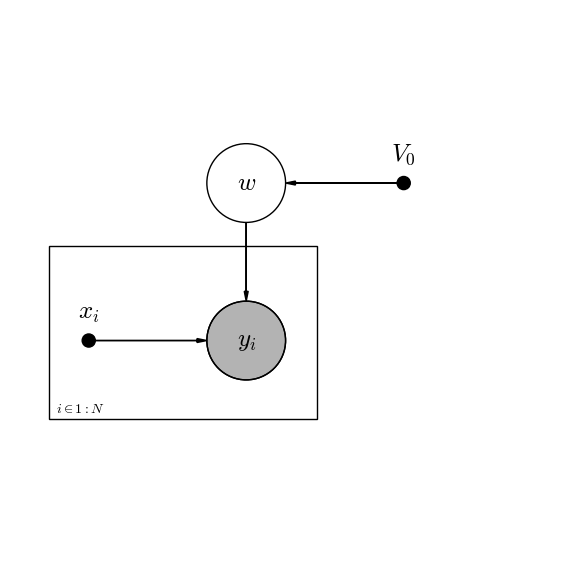

In [102]:
# declare the shape and size, and various styling
pgmB = daft.PGM(shape=[3.5, 3.5], origin=[-0.5, 0], grid_unit=4,
               label_params={'fontsize':18}, observed_style='shaded')

# observed data
pgmB.add_node(daft.Node("y", r"$y_i$", 1, 1.4, scale=2, observed=True))
# pgm.add_node(daft.Node("x", r"$\mathbf{x}_{i}$", 1, 0.8, scale=2, 
#                        fixed=True, offset=(0,-30)))

# individual items plate
pgmB.add_plate(daft.Plate([-0.25, 1.0, 1.7, 1.0], label=r"$i \in 1:N$", 
                         shift=-0.1))

# pooled beta (latent parameters)
pgmB.add_node(daft.Node("z", r"$w$", 1, 2.4, scale=2))
pgmB.add_node(daft.Node("z_pi", r"$V_0$", 2.0, 2.4, scale=2,
                       fixed=True, offset=(0,10)))
# pooled measurement error
# pgmB.add_node(daft.Node("sigma", r"$\sigma^2$", 2, 1.4, scale=2, fixed=True, offset=(0,10)) )
pgmB.add_node(daft.Node("mu", r"$x_i$", 0, 1.4, scale=2, fixed=True, offset=(0,10)))

# draw directed edges
pgmB.add_edge("z_pi", "z")
pgmB.add_edge("z", "y")
# pgm.add_edge("x", "y")
# pgmB.add_edge("sigma", "y")
pgmB.add_edge("mu", "y")

pgmB.render()
plt.savefig("gmmB.png")

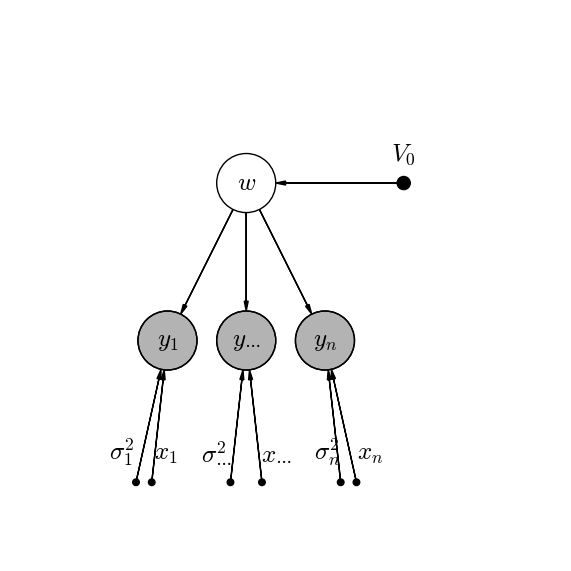

In [88]:
# declare the shape and size, and various styling
pgmUB = daft.PGM(shape=[3.5, 3.5], origin=[-0.5, 0], grid_unit=4,
               label_params={'fontsize':18}, observed_style='shaded')

# multinoulli
pgmUB.add_node(daft.Node("pi", r"$V_0$", 2.0, 2.4, scale=2,
                       fixed=True, offset=(0,10)))
# observed data
pgmUB.add_node(daft.Node("y", r"$y_1$", 0.5, 1.4, scale=1.5, observed=True))
pgmUB.add_node(daft.Node("yd", r"$y_{\cdots}$", 1, 1.4, scale=1.5, observed=True))
pgmUB.add_node(daft.Node("yn", r"$y_n$", 1.5, 1.4, scale=1.5, observed=True))

# pooled beta (latent parameters)
pgmUB.add_node(daft.Node("z", r"$w$", 1.0, 2.4, scale=1.5))


# pooled measurement error
pgmUB.add_node(daft.Node("sigma", r"$\sigma^2_1$", 0.3, 0.5, scale=1.0, fixed=True, offset=(-10,10)) )
pgmUB.add_node(daft.Node("mu", r"$x_1$", 0.4, 0.5, scale=1.0, fixed=True, offset=(10,10)))
pgmUB.add_node(daft.Node("sigmad", r"$\sigma^2_{\cdots}$", 0.9, 0.5, scale=1.0, fixed=True, offset=(-10,10)) )
pgmUB.add_node(daft.Node("mud", r"$x_{\cdots}$", 1.1, 0.5, scale=1.0, fixed=True, offset=(10,10)))
pgmUB.add_node(daft.Node("sigman", r"$\sigma^2_n$", 1.6, 0.5, scale=1.0, fixed=True, offset=(-10,10)) )
pgmUB.add_node(daft.Node("mun", r"$x_n$", 1.7, 0.5, scale=1.0, fixed=True, offset=(10,10)))

# draw directed edges
pgmUB.add_edge("pi", "z")

pgmUB.add_edge("z", "y")
pgmUB.add_edge("z", "yd")
pgmUB.add_edge("z", "yn")
# pgm.add_edge("x", "y")
pgmUB.add_edge("sigma", "y")
pgmUB.add_edge("mu", "y")
pgmUB.add_edge("sigmad", "yd")
pgmUB.add_edge("mud", "yd")
pgmUB.add_edge("sigman", "yn")
pgmUB.add_edge("mun", "yn")
pgmUB.render()
plt.savefig("gmmBUnrolled.png")